In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import fuzzywuzzy as fuzz
#from fuzzywuzzy import process

# Load the data CSVs

In [32]:
# Load full_output.csv
df = pd.read_csv('csv_files/full_output.csv')

# drop unnamed columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Load pml_output.csv
pml_df = pd.read_csv('csv_files/pml_output.csv')
pml_df.columns = pml_df.columns.str.strip()

C:\Users\macdk\AppData\Local\Temp\ipykernel_12608\1629307963.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('csv_files/full_output.csv')


## Set variables for filtering

In [33]:
year_list = list(df['Year'].unique())
class_list = list(df['Classification'].unique())
conf_list = list(df['Conference'].unique())

# Functions for analysis

In [34]:
def top_n_grabber(n=20, d=df, y=year_list, cl=class_list, co=conf_list):
    df_grabber = d
    df_grabber = df_grabber[pd.DataFrame(df_grabber.Year.to_list()).isin(y).any(1).values]
    df_grabber = df_grabber[pd.DataFrame(df_grabber.Classification.to_list()).isin(cl).any(1).values]
    df_grabber = df_grabber[pd.DataFrame(df_grabber.Conference.to_list()).isin(co).any(1).values]

    # Select each Selection into a list
    selection_1_list = df_grabber['Selection 1'].tolist()
    selection_2_list = df_grabber['Selection 2'].tolist()
    selection_3_list = df_grabber['Selection 3'].tolist()
    # combine selection 1, 2, and 3 into one dataframe
    full_selection_list = pd.DataFrame(selection_1_list + selection_2_list + selection_3_list)

    top_n_df = pd.DataFrame(full_selection_list.value_counts()[:n])
    top_n_df.columns = ['Count']
    top_n_df.reset_index(drop=False, inplace=True)
    top_n_df.columns = ['Selection', 'Count']
    top_n_df

    # make selection column into a list
    selection_list = top_n_df['Selection'].tolist()
    value_list = top_n_df['Count'].tolist()
    return selection_list, value_list

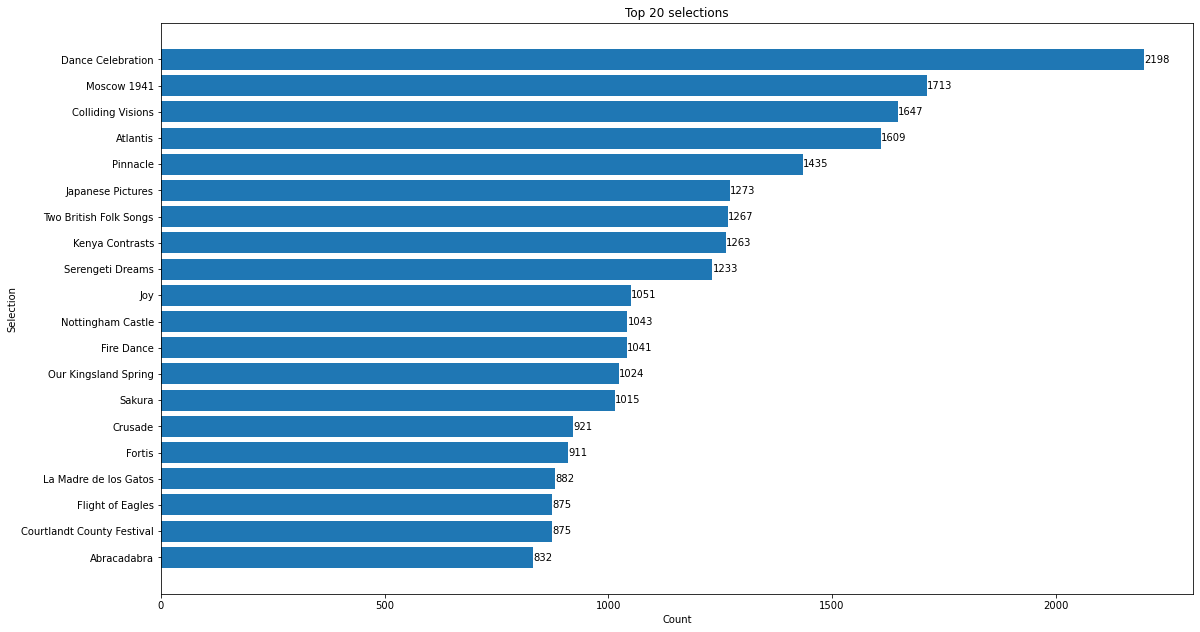

In [35]:
# Plot top n selections
def plotter(n=20, d=df, y=year_list, cl=class_list, co=conf_list):
    fig, ax = plt.subplots()
    bars = ax.barh(top_n_grabber(n, d, y, cl, co)[0], top_n_grabber(n, d, y, cl, co)[1])
    ax.set_title(f'Top {n} selections')
    ax.set_xlabel('Count')
    ax.set_ylabel('Selection')
    for bars in ax.containers:
        ax.bar_label(bars)
    # invert the y-axis
    ax.invert_yaxis()
   # reset size of the plot
    fig.set_size_inches(18.5, 10.5)

    plt.show()

plotter()

# Find Rows by Selection Title

In [36]:
# Combine all rows where any selection contains the search term
def selection_finder(selection, d=df, y=year_list, cl=class_list, co=conf_list):
    df_grabber = d
    df_grabber = df_grabber[pd.DataFrame(df_grabber.Year.to_list()).isin(y).any(1).values]
    df_grabber = df_grabber[pd.DataFrame(df_grabber.Classification.to_list()).isin(cl).any(1).values]
    df_grabber = df_grabber[pd.DataFrame(df_grabber.Conference.to_list()).isin(co).any(1).values]
    finder_df = df_grabber[(df_grabber['Selection 1'].str.contains(selection)) | (df_grabber['Selection 2'].str.contains(selection)) | (df_grabber['Selection 3'].str.contains(selection))]
    return finder_df

selection = 'Rocky Point'
year = [2019]
classification = class_list
conference = conf_list

selection_finder(selection, df, year, class_list, conf_list)

,School,City,Directors,Conference,Classification,Year,Stage Judge 1,Stage Judge 2,Stage Judge 3,Stage Final,...,Selection 3,Date,Region,cj1,cj2,cj3,srj1,srj2,srj3,Stage Average
45957,Vista Ridge High School,Cedar Park,Bryan Christian,AAAAAA,Varsity,2019,1.0,1.0,1.0,1.0,...,Rocky Point Holiday,04/16/2019,Region: 32,mark calima,joe frank,carol nelson,cliff croomes,eric gilley,bob parsons,1.000000
46762,Copperas Cove High School,Copperas Cove,Tony Chapa,AAAAAA,Varsity,2019,1.0,1.0,1.0,1.0,...,Rocky Point Holiday,04/15/2019,Region: 8,jeffrey estes,ann lowes mueller,mike olson,richard hooper,jeff liightsey,david torch,1.000000
46891,Klein High School,Spring,David Gresens,AAAAAA,Varsity,2019,1.0,1.0,1.0,1.0,...,Rocky Point Holiday,04/17/2019,Region: 9,charles aguillon,roland sandoval,joe munoz,bob chreste,russell holcombe,mark buley,1.000000
47747,Nixon HS,Laredo,"Juan Gerardo Sosa / Hector Navarro, Mike Rodri...",AAAAAA,Varsity,2019,1.0,1.0,1.0,1.0,...,Armenian Dances Set I,04/05/2019,Region: 14,"garcia, michael","rios, ronnie","strickland, george","garza, leo","salazar, albert","sanchez, steve",1.000000
48687,Pebble Hills High School,"El Paso,",Maximo Sierra / Raul Chavira/Daniel Hunt/Cecil...,AAAAAA,Varsity,2019,1.0,1.0,2.0,1.0,...,Rocky Point Holiday,04/30/2019,Region: 22,tim bradberry,bill harden,daniel solis,charlie bradberry,george strickland,eddy russell,1.333333
49151,Lebanon Trail HS,Frisco,Kelly Wykoff,AAAAA,Varsity,2019,1.0,1.0,1.0,1.0,...,Southern Harmony,04/16/2019,Region: 24,bob bryant,dennis hopkins,charlotte royal,richard crain,david clemmer,john stuckey,1.000000
49374,Dawson High School,Pearland,Aaron Brown,AAAAAA,Varsity,2019,1.0,1.0,1.0,1.0,...,Till Eulenspiegels lustige Streiche,04/24/2019,Region: 19,harry blake,cody myers,charlotte royall,tye ann payne,danny prado,rob toups,1.000000
49652,Waxahachie High School,Waxahachie,"Rich Armstrong / Justin Bell, Reggie Cook, Pau...",AAAAAA,Varsity,2019,1.0,1.0,1.0,1.0,...,Rocky Point Holiday,04/16/2019,Region: 20,bill harden,bill marocco,travis smith,david kirkley,steven moore,cody myers,1.000000


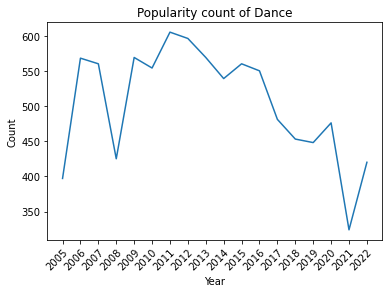

In [37]:
selection = 'Dance'
yearly_count_values = []
selection_finder_df = df


for y in year_list:
    selection_finder_df = selection_finder(selection, df, [y], class_list, conf_list)
    yearly_count_values.append(len(selection_finder_df))

# make a line graph of the yearly count of selections
def yearly_count_plotter(yearly_count_values):
    fig, ax = plt.subplots()
    ax.plot(yearly_count_values)
    ax.set_title(f'Popularity count of {selection}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    # set number of ticks on x-axis to match len(year_list)
    ax.set_xticks(range(len(year_list)))
    # set x labels to year_list
    ax.set_xticklabels(year_list)
    # rotate x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.show()

yearly_count_plotter(yearly_count_values)

# Find Rows by Directors

In [38]:
def director_finder(director, df):
    finder_df = df[df['Directors'].str.contains(director)]
    return finder_df

director = 'Kevin MacDonald'
df_for_search = df

director_finder_df = director_finder(director, df_for_search)
director_finder_df.sort_values(by='Stage Average', ascending=False)

,School,City,Directors,Conference,Classification,Year,Stage Judge 1,Stage Judge 2,Stage Judge 3,Stage Final,...,Selection 3,Date,Region,cj1,cj2,cj3,srj1,srj2,srj3,Stage Average
47192,Sachse High School,Sachse,"John Robinson / Holly Taylor, Kevin MacDonald",AAAAAA,Sub Non-Varsity A,2019,2.0,2.0,3.0,2.0,...,Chanteys,04/16/2019,Region: 3,kenneth capshaw,mike lipe,randy vaughn,keith dye,trevor kay,bob straka,2.333333
47193,Sachse High School,Sachse,"John Robinson / Holly Taylor, Kevin MacDonald",AAAAAA,Sub Non-Varsity B,2019,2.0,2.0,3.0,2.0,...,La Madre de los Gatos,04/16/2019,Region: 3,kenneth capshaw,mike lipe,randy vaughn,keith dye,trevor kay,bob straka,2.333333
47191,Sachse High School,Garland,Kevin MacDonald / Holly Taylor/John Robinson,AAAAAA,Non-Varsity,2019,2.0,1.0,2.0,2.0,...,Light Cavalry,04/16/2019,Region: 3,kenneth capshaw,mike lipe,randy vaughn,keith dye,trevor kay,bob straka,1.666667
47194,Sachse HS Band,Sachse,"Holly Taylor / Kevin MacDonald, John Robinson",AAAAAA,Varsity,2019,2.0,1.0,2.0,2.0,...,Danzon No 2,04/16/2019,Region: 3,kenneth capshaw,mike lipe,randy vaughn,keith dye,trevor kay,bob straka,1.666667
57337,Sachse High School,Garland,"Garrett Tucker / Holly Taylor, Kevin MacDonald",AAAAAA,Sub Non-Varsity B,2022,1.0,2.0,2.0,2.0,...,Flight of Eagles,04/12/2022,Region: 3,bill centera,stacy gist,pete tolhuizen,alan harkey,alyson keller,gary monroe,1.666667
39391,Sachse High School,Sachse,"John Robinson / Holly Taylor, Kevin MacDonald",AAAAAA,Sub Non-Varsity A,2017,1.0,2.0,2.0,2.0,...,La Bonne Aventure,04/19/2017,Region: 3,joe frank,don haynes,ferd vollmar,kenneth capshaw,rick davis,daniel galloway,1.666667
43173,Sachse HS Band,Sachse,Holly Taylor / Kevin MacDonald and John Robinson,AAAAAA,Sub Non-Varsity B,2018,1.0,1.0,2.0,1.0,...,Sketches of Canada,04/17/2018,Region: 3,mike brashear,bill centera,kathy johnson,mike bullock,bob ferguson,alan harkey,1.333333
35765,Sachse HS Band,Sachse,Kevin MacDonald / Holly Taylor/John Robinson,AAAAAA,Non-Varsity,2016,1.0,1.0,2.0,1.0,...,Choreography,04/12/2016,Region: 3,alan harkey,mike lipe,jeremy strickland,todd dixon,jim mcdaniel,joe nunez,1.333333
39367,Sachse HS Band,Sachse,Kevin MacDonald / Holly Taylor/John Robinson,AAAAAA,Non-Varsity,2017,1.0,1.0,2.0,1.0,...,Americans We,04/19/2017,Region: 3,joe frank,don haynes,ferd vollmar,kenneth capshaw,rick davis,daniel galloway,1.333333
35789,Sachse High School,Sachse,"John Robinson / Holly Taylor, Kevin MacDonald",AAAAAA,Sub Non-Varsity A,2016,1.0,2.0,1.0,1.0,...,La Madre de los Gatos,04/12/2016,Region: 3,alan harkey,mike lipe,jeremy strickland,todd dixon,jim mcdaniel,joe nunez,1.333333


In [39]:
director_score = director_finder_df['Stage Average'].mean()
director_score

1.3174603174603174

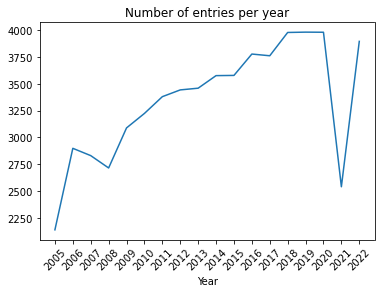

In [40]:
# Plot a line graph of the number of rows in each year
df_year_counter = df.groupby('Year').size()
df_year_counter.plot(kind='line')
plt.xticks(year_list)
plt.xticks(rotation=45)
plt.title('Number of entries per year')
plt.show()

In [41]:
stage_judge_name_columns = ['cj1', 'cj2', 'cj3']
sr_judge_name_columns = ['srj1', 'srj2', 'srj3']

cj1_list = df['cj1'].to_list()
cj2_list = df['cj2'].to_list()
cj3_list = df['cj3'].to_list()
srj1_list = df['srj1'].to_list()
srj2_list = df['srj2'].to_list()
srj3_list = df['srj3'].to_list()

all_stage_judges_list = cj1_list + cj2_list + cj3_list
stage_judge_unique = list(set(all_stage_judges_list))


all_sr_judges_list = srj1_list + srj2_list + srj3_list
sr_judge_unique = list(set(all_sr_judges_list))

all_list = all_stage_judges_list + all_sr_judges_list
all_unique = list(set(all_list))



[nan,
 'mike barns',
 'finnels, jason',
 'jonathan kelly',
 'jeff liightsey',
 'justin nuckols',
 'christopher bailey',
 'james snider',
 'david rodriguez',
 'abe castellano',
 'ruth lim',
 'robert hesse',
 'michielle benson',
 'garland chiasson',
 'jason adam',
 'mike brashears',
 'brian britt',
 'ketih bearden',
 'boothman, ross',
 'johnson, clay',
 'n-scott deppe; s-mark melton',
 'raul ramirez',
 'rick baker - arlington',
 'jay lester',
 'david andrus',
 'sean hill - pilot point',
 'wayne mawxell',
 'scott taylor',
 'barry hurt',
 'ty ann payne',
 'wendell gideon',
 'john duggan',
 'bearden, june',
 'betty pierce (chmn.)',
 'jeremy strickland - springtown',
 'ben katz, frisco',
 'rustin honeycutt',
 'russell bowlin',
 'judge 4',
 'zac serrato',
 'charles cabrera, jr.',
 'russell sanders',
 'pat paris/larry matysiak',
 'jame marioneaux',
 'allen, daniel/san luis, manuel',
 'bissett, ron',
 'robin hidrogo - springtown',
 'lisa stiles',
 'megan czerwieski',
 'eddie benitez, la feria h